In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from fancyimpute import KNN    
from sklearn.model_selection import train_test_split,cross_val_score, KFold, StratifiedKFold ,GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder, Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,confusion_matrix, classification_report, auc, roc_curve, precision_recall_curve, \
average_precision_score,make_scorer,recall_score, accuracy_score, precision_score
from sklearn import svm
from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor
import warnings; warnings.simplefilter('ignore')
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline

Using TensorFlow backend.
E:\Users\RicardoHuarte\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [7]:
pi = pd.read_csv(filepath_or_buffer='PI_DataSet.txt',  delimiter='\t')

In [9]:
pi.sample(10)

,SeqID,FPV,ATV,IDV,LPV,NFV,SQV,TPV,DRV,P1,...,P91,P92,P93,P94,P95,P96,P97,P98,P99,CompMutList
85,90006,90.0,100.0,24.0,80.0,60.0,100.0,17.0,22.0,-,...,-,K,L,-,-,-,-,-,-,"L10I, T12S, I13V, K20R, L33LF, E35D, M36I, N37..."
218,116922,100.0,100.0,29.0,51.0,79.0,27.0,28.0,97.0,-,...,-,-,L,-,-,-,-,-,-,"I3F, L10I, K20R, V32I, L33F, E34K, E35D, M36I,..."
41,54410,48.0,NaN,2.4,31.0,4.1,2.0,NaN,NaN,-,...,-,-,-,-,-,-,-,-,-,"L10F, M46I, I47V, I50V"
165,61157,0.6,NaN,0.6,0.7,0.8,0.5,NaN,NaN,-,...,-,-,-,-,-,-,-,-,-,"I13V, R41K, I64V, H69Y"
1315,148025,0.7,1.3,1.4,1.3,1.7,0.9,0.9,0.6,-,...,-,-,L,-,-,-,-,-,-,"M36I, I62V, L63P, I93L"
230,259219,0.7,0.9,0.8,0.7,1.0,0.8,0.7,0.8,-,...,-,-,-,-,-,-,-,-,-,"E35D, N37S, R41K, R57G, I62IV, L63A, I72IV"
1913,44112,1.1,NaN,1.1,NaN,1.9,1.1,NaN,NaN,-,...,-,-,-,-,-,-,-,-,-,"L63P, I64L, V77I"
536,26105,3.2,NaN,7.5,NaN,9.3,2.6,NaN,NaN,-,...,-,R,L,-,F,-,-,-,-,"Q18H, L19I, M46L, L63P, L90M, Q92R, I93L, C95F"
1118,26899,0.5,NaN,0.5,0.5,0.6,0.7,NaN,NaN,-,...,-,K,-,-,-,-,-,-,-,"L19IV, L33V, N37A, L63H, I64V, K70E, Q92K"
39,54408,8.4,NaN,3.2,7.7,3.4,3.7,NaN,NaN,-,...,-,-,-,-,-,-,-,-,-,"L10F, I84V"


In [10]:
med=['FPV','ATV','IDV','LPV','NFV','SQV','TPV','DRV']

In [11]:
other_cols=pi.columns.difference(med)

In [12]:
other_cols

Index(['CompMutList', 'P1', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17',
       ...
       'P91', 'P92', 'P93', 'P94', 'P95', 'P96', 'P97', 'P98', 'P99', 'SeqID'],
      dtype='object', length=101)

In [14]:
pi_prep=pi.melt( id_vars=other_cols, value_name='resistance',var_name='med', value_vars=med)

In [15]:
not_seq=['CompMutList','SeqID','med','resistance']

In [16]:
column_sequences=pi_prep.columns.difference(not_seq)

In [17]:
column_sequences

Index(['P1', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18',
       'P19', 'P2', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P3', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'P38', 'P39', 'P4', 'P40', 'P41', 'P42', 'P43', 'P44', 'P45',
       'P46', 'P47', 'P48', 'P49', 'P5', 'P50', 'P51', 'P52', 'P53', 'P54',
       'P55', 'P56', 'P57', 'P58', 'P59', 'P6', 'P60', 'P61', 'P62', 'P63',
       'P64', 'P65', 'P66', 'P67', 'P68', 'P69', 'P7', 'P70', 'P71', 'P72',
       'P73', 'P74', 'P75', 'P76', 'P77', 'P78', 'P79', 'P8', 'P80', 'P81',
       'P82', 'P83', 'P84', 'P85', 'P86', 'P87', 'P88', 'P89', 'P9', 'P90',
       'P91', 'P92', 'P93', 'P94', 'P95', 'P96', 'P97', 'P98', 'P99'],
      dtype='object')

In [18]:
pi_prep

,CompMutList,P1,P10,P11,P12,P13,P14,P15,P16,P17,...,P93,P94,P95,P96,P97,P98,P99,SeqID,med,resistance
0,"D30N, R57G, N88D",-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12861,FPV,0.4
1,"D30N, M46I, R57G, L63P, N88D",-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12862,FPV,0.8
2,"M46I, R57G, L63P, V82T, I84V",-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12863,FPV,3.0
3,"L10R, M46I, R57G, L63P, V82T, I84V",-,R,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12864,FPV,4.4
4,"L10I, R57G, L63P, A71V, I84V, L90M",-,I,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12865,FPV,3.6
5,"L10I, M46I, R57G, L63P, A71V, I84V, L90M",-,I,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12866,FPV,4.5
6,"G48V, R57G, L90M",-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12867,FPV,2.3
7,"R57G, N88S",-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,13255,FPV,0.1
8,"R57G, L63P, N88S",-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,13256,FPV,0.1
9,"M46L, R57G, L63P, N88S",-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,13257,FPV,0.1


In [19]:
pi_prep[pi_prep.apply(lambda r: r.str.contains('b', case=False).any(), axis=1)] 

,CompMutList,P1,P10,P11,P12,P13,P14,P15,P16,P17,...,P93,P94,P95,P96,P97,P98,P99,SeqID,med,resistance


In [20]:
pi_prep[column_sequences] = pi_prep[column_sequences].replace({'.':np.nan, '#':np.nan, '~':np.nan, '*':np.nan})

In [21]:
pi_prep.dropna(subset=column_sequences, inplace=True)


In [22]:
pi_prep.dropna(inplace=True)

In [23]:
pi_prep.drop('CompMutList', axis=1, inplace=True)

In [25]:
pi_prep.head()

,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,...,P93,P94,P95,P96,P97,P98,P99,SeqID,med,resistance
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12861,FPV,0.4
1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12862,FPV,0.8
2,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12863,FPV,3.0
3,-,R,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12864,FPV,4.4
4,-,I,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12865,FPV,3.6


In [26]:
for i in column_sequences:
    pi_prep[i]=pi_prep[i].str[0:2]

In [27]:
pi_prep[(pi_prep.SeqID==148035)]

,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,...,P93,P94,P95,P96,P97,P98,P99,SeqID,med,resistance
1847,-,FI,-,-,IV,KR,-,GA,-,-,...,IL,GD,-,-,-,-,-,148035,FPV,8.9
3798,-,FI,-,-,IV,KR,-,GA,-,-,...,IL,GD,-,-,-,-,-,148035,ATV,5.3
5749,-,FI,-,-,IV,KR,-,GA,-,-,...,IL,GD,-,-,-,-,-,148035,IDV,16.0
7700,-,FI,-,-,IV,KR,-,GA,-,-,...,IL,GD,-,-,-,-,-,148035,LPV,54.0
9651,-,FI,-,-,IV,KR,-,GA,-,-,...,IL,GD,-,-,-,-,-,148035,NFV,22.0
11602,-,FI,-,-,IV,KR,-,GA,-,-,...,IL,GD,-,-,-,-,-,148035,SQV,3.7
13553,-,FI,-,-,IV,KR,-,GA,-,-,...,IL,GD,-,-,-,-,-,148035,TPV,1.4
15504,-,FI,-,-,IV,KR,-,GA,-,-,...,IL,GD,-,-,-,-,-,148035,DRV,1.7


In [28]:
pi_copy=pi_prep.copy()

In [29]:
test=pd.DataFrame()

In [30]:
test

""


In [31]:
pi_copy=pi_prep.copy()
test=pd.DataFrame()


In [32]:
for index, row in pi_copy.iterrows():
    
    if row[0]=='-':
        test=test.append(row)
        count=+1
        print(row[0])
    elif len(row[0])>1:
        changes=list(row[i])
        for j in changes:
            row_copy=row.copy()
            row_copy[i]=j
            test=test.append(row_copy)

        count2=+1
pi_copy=test.copy()
test=pd.DataFrame()
count

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-


KeyboardInterrupt: 

In [ ]:
pi_copy

In [33]:
for i in column_sequences:
    
    for index, row in pi_copy.iterrows():
        if len(row[i])==1:
            test=test.append(row)
            count=+1
        elif len(row[i])>1:
            
            
            changes=list(row[i])
            for j in changes:
                row_copy=row.copy()
                row_copy[i]=j
                test=test.append(row_copy)
            
            count2=+1
    pi_copy=test.copy()
    test=pd.DataFrame() 

KeyboardInterrupt: 

In [35]:
pi_copy.head()

,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,...,P93,P94,P95,P96,P97,P98,P99,SeqID,med,resistance
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12861.0,FPV,0.4
1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12862.0,FPV,0.8
2,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12863.0,FPV,3.0
3,-,R,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12864.0,FPV,4.4
4,-,I,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12865.0,FPV,3.6


In [ ]:
pi_copy

In [36]:
for i in column_sequences:
    pi_copy[i]=pi_copy[i].str[0:1]

In [37]:
pi_copy

,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,...,P93,P94,P95,P96,P97,P98,P99,SeqID,med,resistance
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12861.0,FPV,0.4
1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12862.0,FPV,0.8
2,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12863.0,FPV,3.0
3,-,R,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12864.0,FPV,4.4
4,-,I,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12865.0,FPV,3.6
5,-,I,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12866.0,FPV,4.5
6,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,12867.0,FPV,2.3
7,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,13255.0,FPV,0.1
8,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,13256.0,FPV,0.1
9,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,13257.0,FPV,0.1


In [39]:
pi_copy.to_csv(path_or_buf='pi_expanded_trimmed.csv')

In [41]:
pi_copy[(pi_copy.SeqID==148035)].head()

,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,...,P93,P94,P95,P96,P97,P98,P99,SeqID,med,resistance
1847,-,F,-,-,I,K,-,G,-,-,...,I,G,-,-,-,-,-,148035.0,FPV,8.9
1847,-,F,-,-,I,K,-,G,-,-,...,I,G,-,-,-,-,-,148035.0,FPV,8.9
1847,-,F,-,-,I,K,-,G,-,-,...,I,G,-,-,-,-,-,148035.0,FPV,8.9
1847,-,F,-,-,I,K,-,G,-,-,...,I,G,-,-,-,-,-,148035.0,FPV,8.9
1847,-,F,-,-,I,K,-,G,-,-,...,I,G,-,-,-,-,-,148035.0,FPV,8.9


In [40]:
pi_prep[(pi_prep.SeqID==148035)]

,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,...,P93,P94,P95,P96,P97,P98,P99,SeqID,med,resistance
1847,-,FI,-,-,IV,KR,-,GA,-,-,...,IL,GD,-,-,-,-,-,148035,FPV,8.9
3798,-,FI,-,-,IV,KR,-,GA,-,-,...,IL,GD,-,-,-,-,-,148035,ATV,5.3
5749,-,FI,-,-,IV,KR,-,GA,-,-,...,IL,GD,-,-,-,-,-,148035,IDV,16.0
7700,-,FI,-,-,IV,KR,-,GA,-,-,...,IL,GD,-,-,-,-,-,148035,LPV,54.0
9651,-,FI,-,-,IV,KR,-,GA,-,-,...,IL,GD,-,-,-,-,-,148035,NFV,22.0
11602,-,FI,-,-,IV,KR,-,GA,-,-,...,IL,GD,-,-,-,-,-,148035,SQV,3.7
13553,-,FI,-,-,IV,KR,-,GA,-,-,...,IL,GD,-,-,-,-,-,148035,TPV,1.4
15504,-,FI,-,-,IV,KR,-,GA,-,-,...,IL,GD,-,-,-,-,-,148035,DRV,1.7


In [42]:
pre=pi_copy

In [126]:
pre.head()

,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,...,P94,P95,P96,P97,P98,P99,SeqID,med,resistance,label
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,12861.0,FPV,0.4,0
1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,12862.0,FPV,0.8,0
2,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,12863.0,FPV,3.0,1
3,-,R,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,12864.0,FPV,4.4,1
4,-,I,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,12865.0,FPV,3.6,1


In [45]:
pre[['med']].drop_duplicates()

,med
0,FPV
1966,ATV
3902,IDV
5880,LPV
7804,NFV
9755,SQV
11760,TPV
13711,DRV


In [52]:
def get_label(row):
    list_1=['SQV','IDV','LPV','FPV','ATV','NFV','DRV']
    list_2=['TPV']
    if row['med'] in list_1:
        if row['resistance'] < 3:
            label=0
        
        else:
            label=1
    elif row['med'] in list_2:
        if row['resistance'] < 2:
            label=0
        
        else:
            label=1
    return label
        

In [53]:
pre['label']=pre.apply(get_label,axis=1)

In [54]:
pre['label'].value_counts()

1    18343
0    17298
Name: label, dtype: int64

In [118]:
golden=pre.drop(columns=['SeqID','resistance'],axis=1)

In [119]:
golden[column_sequences] = golden[column_sequences].replace({'.':np.nan, '#':np.nan, '~':np.nan, '*':np.nan})
golden.dropna(subset=column_sequences, inplace=True)

In [125]:
golden.head()

,label,P1_-,P10_-,P10_C,P10_F,P10_H,P10_I,P10_L,P10_M,P10_R,...,P98_V,P99_-,med_ATV,med_DRV,med_FPV,med_IDV,med_LPV,med_NFV,med_SQV,med_TPV
0,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [121]:
aminos=[]
for i in column_sequences:
    list_3=golden[i].drop_duplicates().tolist()
    for j in list_3:
        aminos.append(j)

In [122]:
aminos = list(dict.fromkeys(aminos))
aminos

['-',
 'R',
 'I',
 'F',
 'L',
 'V',
 'Y',
 'X',
 'S',
 'M',
 'T',
 'H',
 'C',
 'A',
 'P',
 'D',
 'K',
 'N',
 'Q',
 'E',
 'G',
 'W']

In [124]:
golden= pd.get_dummies(golden)

In [128]:
golden_x= golden.drop(['label'], axis=1)
golden_y= golden['label']


In [129]:
x_train, x_test, y_train, y_test = train_test_split(golden_x,golden_y, test_size=0.25,stratify=golden_y)
#stratified train test split to have balanced classes in training and testing sets

In [130]:
y_train.value_counts()

1    13757
0    12969
Name: label, dtype: int64

Accuracy of logistic regression classifier on test set: 0.93
             precision    recall  f1-score   support

          0       0.93      0.93      0.93      4323
          1       0.93      0.94      0.93      4586

avg / total       0.93      0.93      0.93      8909



Text(0.5,15,'Predicted label')

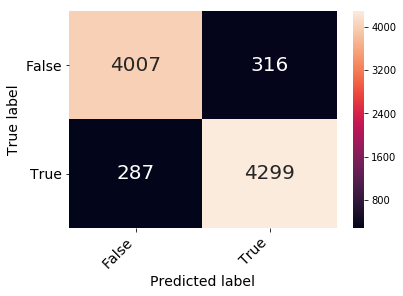

In [138]:
clf = LogisticRegression(C=0.1, penalty='l1', class_weight='balanced')
clf.fit(x_train, y_train)
test_y_pred = clf.predict(x_test)
cf_mt = confusion_matrix(y_test, test_y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))
print(classification_report(y_test, test_y_pred))
confusion_matrix_df = pd.DataFrame(cf_mt, ('False', 'True'), ('False', 'True'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

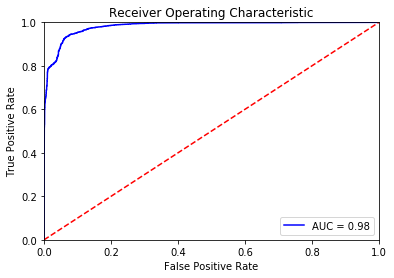

In [139]:
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5,1,'2-class Precision-Recall curve: AP=0.98')

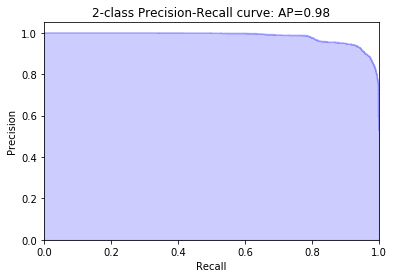

In [140]:
average_precision = average_precision_score(y_test, preds)
precision, recall, _ = precision_recall_curve(y_test, preds)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,  color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format( average_precision))

In [141]:
randomForest = RandomForestClassifier( max_depth=5, max_features=5, min_samples_split=4, n_estimators=100)
randomForest.fit(x_train, y_train)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(x_test, y_test)))

Accuracy of random forest classifier on test set: 0.89


Accuracy: 0.892 (0.002)


Text(0.5,15,'Predicted label')

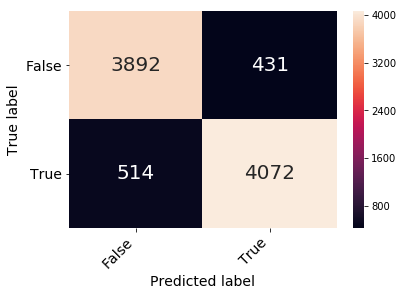

In [142]:
seed = 7
k_fold = KFold(n_splits=2, random_state=seed)
scoring = 'accuracy'
results = results=cross_val_score(randomForest, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))


randomForest.fit(x_train,y_train)
predicted=randomForest.predict(x_test)
matrix = confusion_matrix(y_test, predicted)

confusion_matrix_df = pd.DataFrame(matrix, ('False', 'True'), ('False', 'True'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

Feature ranking:
1. feature 159 (0.035533)
2. feature 261 (0.034484)
3. feature 486 (0.033993)
4. feature 262 (0.030616)
5. feature 506 (0.030118)
6. feature 536 (0.026769)
7. feature 422 (0.024726)
8. feature 1 (0.023128)
9. feature 161 (0.021826)
10. feature 308 (0.021772)
11. feature 415 (0.021497)
12. feature 14 (0.021166)
13. feature 501 (0.020540)
14. feature 332 (0.020316)
15. feature 352 (0.019579)
16. feature 538 (0.019475)
17. feature 5 (0.019224)
18. feature 424 (0.017164)
19. feature 307 (0.016559)
20. feature 427 (0.016025)
21. feature 298 (0.014370)
22. feature 317 (0.014043)
23. feature 65 (0.013594)
24. feature 71 (0.013470)
25. feature 118 (0.013418)
26. feature 89 (0.013290)
27. feature 16 (0.012971)
28. feature 534 (0.012214)
29. feature 353 (0.012043)
30. feature 157 (0.011754)
31. feature 252 (0.009888)
32. feature 98 (0.009568)
33. feature 173 (0.009546)
34. feature 496 (0.009106)
35. feature 487 (0.009075)
36. feature 344 (0.008819)
37. feature 187 (0.008581)
38.

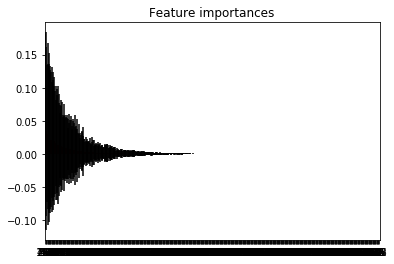

In [143]:
importances = randomForest.feature_importances_
std = np.std([tree.feature_importances_ for tree in randomForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(golden_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(golden_x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(golden_x.shape[1]), indices)
plt.xlim([-1, golden_x.shape[1]])
plt.show()

In [148]:
models = [{    'label': 'Logistic Regression',
    'model': LogisticRegression(),                
},
{    'label': 'RandomForest',
    'model': RandomForestClassifier(),
} ,
{    'label': 'Adaboost',
    'model': AdaBoostClassifier(),
} ]

In [149]:
print('Validation on testing set')
for m in models:
    model = m['model']# select the model
    model.fit(x_train, y_train) # train the model
    test_y_pred = model.predict(x_test)
    cf_mt = confusion_matrix(y_test, test_y_pred)
    print('Accuracy of %s: classifier on test set: %.3f'%(m['label'],model.score(x_test, y_test)))
    print(classification_report(y_test, test_y_pred))

Validation on testing set
Accuracy of Logistic Regression: classifier on test set: 0.936
             precision    recall  f1-score   support

          0       0.94      0.93      0.93      4323
          1       0.93      0.94      0.94      4586

avg / total       0.94      0.94      0.94      8909

Accuracy of RandomForest: classifier on test set: 0.964
             precision    recall  f1-score   support

          0       0.96      0.96      0.96      4323
          1       0.97      0.96      0.96      4586

avg / total       0.96      0.96      0.96      8909

Accuracy of Adaboost: classifier on test set: 0.921
             precision    recall  f1-score   support

          0       0.92      0.92      0.92      4323
          1       0.92      0.93      0.92      4586

avg / total       0.92      0.92      0.92      8909



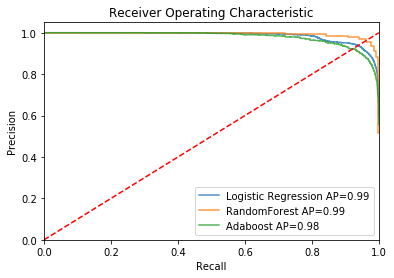

In [150]:
plt.figure()

# Below for loop iterates through your models list
for m in models:
    model = m['model']# select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
    probs = model.predict_proba(x_test)
    preds = probs[:,1]
    average_precision = average_precision_score(y_test, preds)
    precision, recall, _ = precision_recall_curve(y_test, preds)
    plt.step(recall, precision,  alpha=0.8, where='post',label='%s AP=%0.2f' % (m['label'], average_precision))
    #plt.fill_between(recall, precision, step='post', alpha=0.2)

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

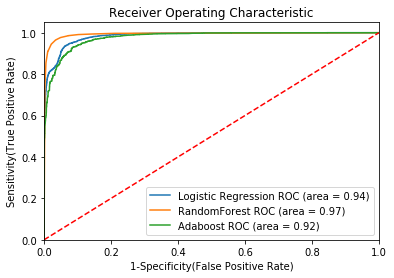

In [151]:
plt.figure()

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc_ = roc_auc_score(y_test,model.predict(x_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc_))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display